## Спектр сигнала

Импортируем библиотеки

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.fftpack import fft
#plt.rc('font',**{'family':'verdana'})

# Часть 1. Вычисление спектра прямоугольного импульса

1.1. Напишем функцию, которая возвращает массивы сигнала и меток времени

In [2]:
def imp_generator(fd, N, d_imp):
    dt = 1.0/fd  #Период опроса, с
    d=N/fd        #Длительность сигнала, с
    n_imp=int(d_imp*fd) #Длительность импульса, отсчеты
    begin_imp=round(fd*d/2-fd*d_imp/2) #Начало импульса, отс.
    end_imp=begin_imp+n_imp            #Конец импульса, отс.
    t = np.arange(0.0, d, dt) #Массив меток времени, с
    signal_imp = np.zeros(len(t)) # Инициализация сигнала нулями 
    signal_imp[int(begin_imp):int(end_imp)] = 1.0   # Создание импульса
    return signal_imp, t

1.2. Сгенерируем прямоугольный импульс: 
- частота опроса 10000 Гц; 
- длительность 1024 отсчета; 
- длительность импульса 10 мс.

In [3]:
fd=10000     #Частота опроса, Гц
N=1024       #Длительность сигнала, отс
d_imp=0.01   #Длительность импульса, с
signal_imp1, t1=imp_generator(fd, N, d_imp)

1.3. Вычислим спектр

In [4]:
k = np.arange(N) # Номера отсчетов спектра
T = float(N)/fd 
frq = k/T # Привязка отсчетов спектра к частотам (полный диапазон частот)

# Вставьте свой код для вычисления и нормализации комплексного спектра
Ycomplex = fft(signal_imp1)/N

# Вставьте свой код для вычисления спектра амплитуд
Y = np.abs(Ycomplex)

# Вставьте свой код для вычисления спектра амплитуд в логарифмическом масштабе
Ylog = 20*np.log10(Y+0.0001)


1.4. Отобразим сигнал и его спектр

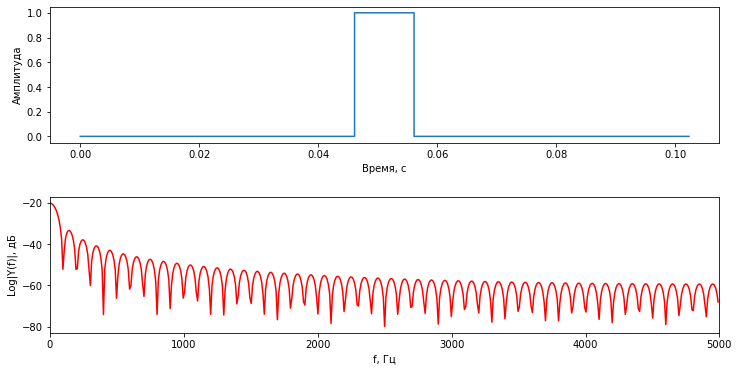

In [5]:
f, ax = plt.subplots(2, 1,figsize=(12, 6))

ax[0].step(t1, signal_imp1)
ax[0].set_xlabel('Время, с')
ax[0].set_ylabel('Амплитуда')

# Отобразить спектр амплитуд (половину частотного диапазона)
ax[1].plot(frq[0:int(N/2)],Ylog[0:int(N/2)],'r') #plotting the log spectrum
ax[1].set_xlabel('f, Гц')
ax[1].set_ylabel('Log|Y(f)|, дБ')
ax[1].set_xlim([0,frq[int(N/2)]])

plt.subplots_adjust(wspace=0.12, hspace=0.4) 

## Часть 2. Вычисление спектра прямоугольного импульса

2.1. Используя функцию-генератор, создайте три прямоугольных импульса (в разных массивах):
- частоты опроса 10000Гц;
- длительности сигналов 1024 отсчета;
- длительности импульсов 4 мс., 2 мс., 1 мс. 

In [6]:
#Отредактируйте код для выполнения задания
fd=10000     #Частота опроса, Гц
N=1024       #Длительность сигнала, отс
signal_imp1, t1=imp_generator(fd, N, 0.004)
signal_imp2, t2=imp_generator(fd, N, 0.002)
signal_imp3, t3=imp_generator(fd, N, 0.001)

2.2. Вычислите спектры сигналов

In [7]:
k = np.arange(N) # Номера отсчетов спектра
T = float(N)/fd 
frq = k/T # Привязка отсчетов спектра к частотам (полный диапазон частот)

# Вставьте свой код для вычисления и нормализации комплексного спектра
Ylog1 = 20*np.log10(np.abs(fft(signal_imp1)/N)+0.0001)
Ylog2 = 20*np.log10(np.abs(fft(signal_imp2)/N)+0.0001)
Ylog3 = 20*np.log10(np.abs(fft(signal_imp3)/N)+0.0001)



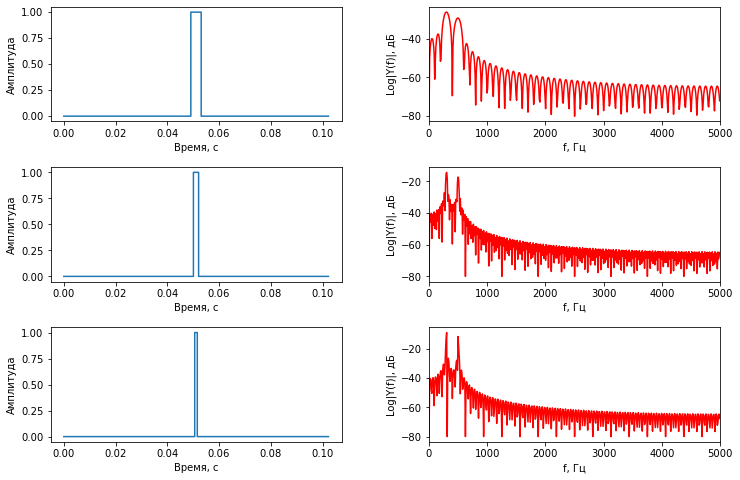

In [24]:
f, ax = plt.subplots(3, 2,figsize=(12, 8))

def graf(Ylog, signal_imp, frq, i):
    ax[i][0].step(t1, signal_imp)
    ax[i][0].set_xlabel('Время, с')
    ax[i][0].set_ylabel('Амплитуда')
    ax[i][1].plot(frq[0:int(N/2)],Ylog[0:int(N/2)],'r') #plotting the log spectrum
    ax[i][1].set_xlabel('f, Гц')
    ax[i][1].set_ylabel('Log|Y(f)|, дБ')
    ax[i][1].set_xlim([0,frq[int(N/2)]])
    
graf(Ylog1, signal_imp1, frq, 0)
graf(Ylog2, signal_imp2, frq, 1)
graf(Ylog3, signal_imp3, frq, 2)

plt.subplots_adjust(wspace=0.3, hspace=0.4) 

2.3. Измерение параметров спектра импульсов

Сигналы импульсной природы чаще всего имеют "лепестковую" структуру спектра. В спектре таких сигналов можно выделить главный лепесток, содержащий большую часть энергии спектра, и затухающие боковые. Лепестковые спектры имеют две важные для спектрального анализа характеристики:
- уровень боковых лепестков;
- ширина главного лепестка.

Для измерения уровня боковых лепестков необходимо найти разность логарифмических (!) амплитуд первого (с наиболшей энергией) бокового лепестка и главного лепестка.
Ширина главного лепестка измеряется по первому локальному минимуму спектра амплитуд импульса.

#### Задание
1. Программным способом выполните измерение уровня боковых лепестков и ширины главного лепестка в спектрах сгенерированных ранее прямоугольных импульсов. Рекомендуется оформить код в виде функции.
2. В отчете оформите результаты измерений в виде таблицы

|Длительность окна, мс.|Уровень боковых лепестков, дБ|Ширина главного лепестка, Гц|
|-|-|-|
|1|??|??|
|2|??|??|
|4|??|??|

3. Проанализируйте зависимость ширины главного лепестка спактра импульса от длительности импульса. Постарайтесь сделать вывод.

In [17]:
#Напишите код для измерения характеристик спектра импульсов
def charact(Ylog):
    i=0
    while Ylog[i]>Ylog[i+1]:
      i=i+1
    m=frq[i]-frq[0]
    while Ylog[i]<Ylog[i+1]:
      i=i+1
    da=Ylog[i]-Ylog[0]
    return m, da

m1, da1=charact(Ylog1)
m2, da2=charact(Ylog2)
m3, da3=charact(Ylog3)


print ('Уровень боковых лепестков импульса 4 мс.',da1)
print ('Уровень боковых лепестков импульса 2 мс.',da2)
print ('Уровень боковых лепестков импульса 1 мс.',da3)
print ('==============================================')
print ('Ширина главного лепестка импульса 4 мс.',m1)
print ('Ширина главного лепестка импульса 2 мс.',m2)
print ('Ширина главного лепестка импульса 1 мс.',m3)


Уровень боковых лепестков импульса 4 мс. -13.172950386156419
Уровень боковых лепестков импульса 2 мс. -13.033263826805381
Уровень боковых лепестков импульса 1 мс. -12.667664891578617
Ширина главного лепестка импульса 4 мс. 253.90625
Ширина главного лепестка импульса 2 мс. 498.046875
Ширина главного лепестка импульса 1 мс. 996.09375


# 3. Спектр гармонического сигнала
3.1. Сгенерируйте сигнал, состоящий из двух синусоидальных гармоник с параметрами:
- чатота дискретизации 10000 Гц;
- длительность сигнала 1024 отсчета;
- амплитуды гармоник 1.0 и 0.7;
- частоты гармоник 300 Гц и 500 Гц.


In [35]:
# Введите код для выполнения задания

fd=10000 
dt = 1.0/fd  
d=0.1024 
t = np.arange(0.0, d, dt) 
s1 = 1.0*np.sin(2*np.pi*300*t)
s2 = 0.7*np.sin(2*np.pi*500*t)
y = s1 + s2

In [36]:
N=1024 
k = np.arange(N) 
T = float(N)/fd 
frq = k/T 
Ycomplex = fft(y)/N    
Y = np.abs(Ycomplex)            
Ylog = 20*np.log10(Y+0.0001)

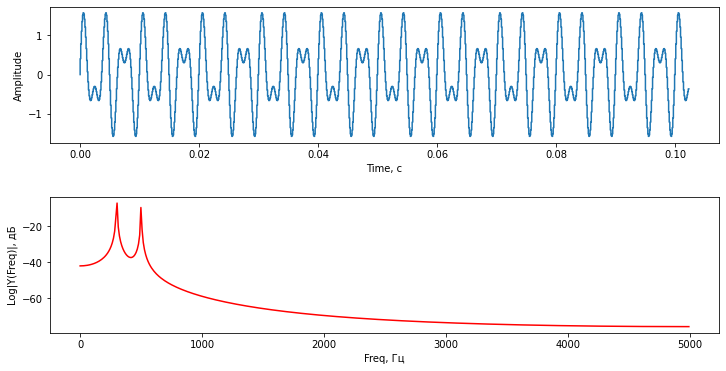

In [37]:
f, ax = plt.subplots(2, 1,figsize=(12, 6))

ax[0].step(t, y)
ax[0].set_xlabel('Time, с')
ax[0].set_ylabel('Amplitude')

ax[1].plot(frq[0:int(N/2)],Ylog[0:int(N/2)],'r') #plotting the log spectrum
ax[1].set_xlabel('Freq, Гц')
ax[1].set_ylabel('Log|Y(Freq)|, дБ')

plt.subplots_adjust(wspace=0.12, hspace=0.4) 

# 4. Оконное преобразование Фурье (кратковременный спектральный анализ)
Преобразование Фурье правомерно для сигналов бесконечной длительности. Однако, поскольку реальные сигналы конечны во времени, и к тому же в большинстве ситуаций необходимо знать, как меняются спектральные свойства сигнала от одного момента времени к другому, при вычислении спектра анализируют сигналы на конечных отрезках времени. Анализ конечного отрезка сигнала соответствует использованию бесконечного сигнала, домноженного на прямоугольную функцию, равную единице на данном интервале и нулю вне данного интервала. Подобный процесс принято называть взвешиванием, а функцию, на которую сигнал домножают, — взвешивающей функцией или окном.
 
Применение окна анализа во временной области соответствует в спектральной области свертке спектра сигнала со спектром окна анализа. В спектре каждой оконной функции принято различать главный спектральный лепесток и боковые. В результате свертки боковые лепестки спектра окна вносят вклад в значение каждого отсчета результирующего спектра, искажая истинный спектр. Данное явление получило название просачивания. Вместо ожидаемой единственной спектральной составляющей на частоте синусоиды получаем широкий "всплеск", обусловленный влиянием боковых лепестков спектра прямоугольного окна. Просачивание приводит не только к появлению амплитудных ошибок в спектрах дискретных сигналов, но может также маскировать присутствие слабых частотных компонент сигнал на фоне сильных и, следовательно, препятствовать их обнаружению.

Минимизировать эффект просачивания можно выбрав окно с меньшей амплитудой боковых лепестков. Предложено ряд функций окна, применение которых позволяет снизить уровень боковых лепестков по сравнению с тем их уровнем, который они имеют в случае прямоугольного окна. 

#### Окно Хеннинга (Ханна)
$w(n)=0.5 \left(1-\cos \left(\frac{2 \pi n}{N-1} \right) \right)$
#### Окно Хемминга
$w(n)=0.54-0.46 \cos \left(\frac{2 \pi n}{N-1} \right)$
#### Окно Блэкмана
$w(n)=a_0 - a_1 \cos \left( \frac{2 \pi n}{N-1} \right) + a_2 \cos \left( \frac{4 \pi n}{N-1} \right)$, где

$a_0=\frac{1-\alpha}{2}$; $a_1=\frac{1}{2}$; $a_2=\frac{\alpha}{2}$

4.1. Исследуем влияние длительности окна на спектр сигнала. Сгенерируйте сигнал, состоящий из двух синусоидальных гармоник с параметрами:
- чатота дискретизации 10000 Гц;
- длительность сигнала 1024 отсчета;
- амплитуды гармоник 1.0 и 0.7;
- частоты гармоник 300 Гц и 500 Гц.

4.2. Домножте сгенерированный сигнал на прямоугольное окно длительностью 10 мс, 40 мс и 80 мс. Вычислите и отобразите спектры полученных сигналов.

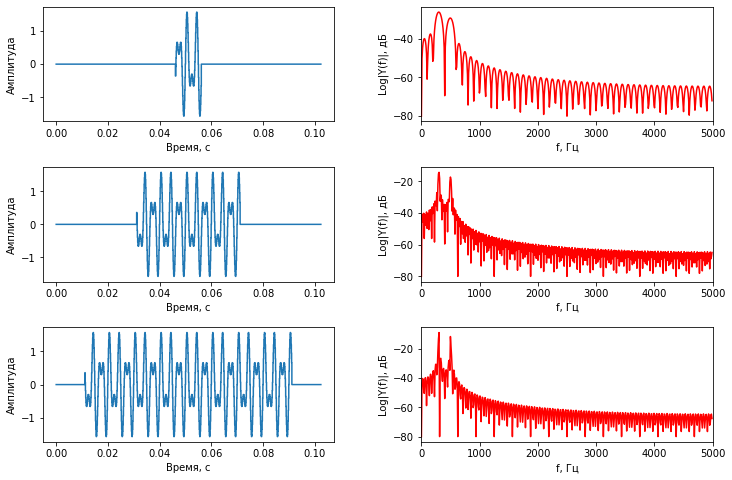

In [26]:
# Введите код для выполнения задания
# Сгенерируйте сигнал 

fd=10000 
dt = 1.0/fd  
d=0.1024
N=1024 
t = np.arange(0.0, d, dt) 
s1 = 1.0*np.sin(2*np.pi*300*t)
s2 = 0.7*np.sin(2*np.pi*500*t)
y = s1 + s2

#Сгенерируйте прямоугольные окна
win1, t1=imp_generator(fd, N, 0.01)
win2, t1=imp_generator(fd, N, 0.04)
win3, t1=imp_generator(fd, N, 0.08)

#Домножте сигнал на окна
yw1=y*win1
yw2=y*win2
yw3=y*win3

#Вычислите спектры
Ylog1 = 20*np.log10(np.abs(fft(yw1)/N)+0.0001)
Ylog2 = 20*np.log10(np.abs(fft(yw2)/N)+0.0001)
Ylog3 = 20*np.log10(np.abs(fft(yw3)/N)+0.0001) 


#Отобразите сигналы и спектры
f, ax = plt.subplots(3, 2,figsize=(12, 8))

graf(Ylog1, yw1, frq, 0)
graf(Ylog2, yw2, frq, 1)
graf(Ylog3, yw3, frq, 2)

plt.subplots_adjust(wspace=0.3, hspace=0.4)

#### Задание
1. Проанализируйте полученные спектры. 
2. Обратите внимание на поведение гармоник в зависимости от длины окна.
3. Сделайте вывод о зависимости величины просачивания от длительности интервала вычисления спектра. 

##### Чем короче интервал вычисления спектра, тем ...

4.3. Исследуем влияние формы окна на спектр сигнала. Для эксперимента будем использовать сигнал из предыдущего опыта (см. п. 4.1.).

4.4. Домножайте сигнал на окна Хемминга, Ханна, Блэкмана длительностью 40 мс. Вычислите и отобразите спектры полученных сигналов.

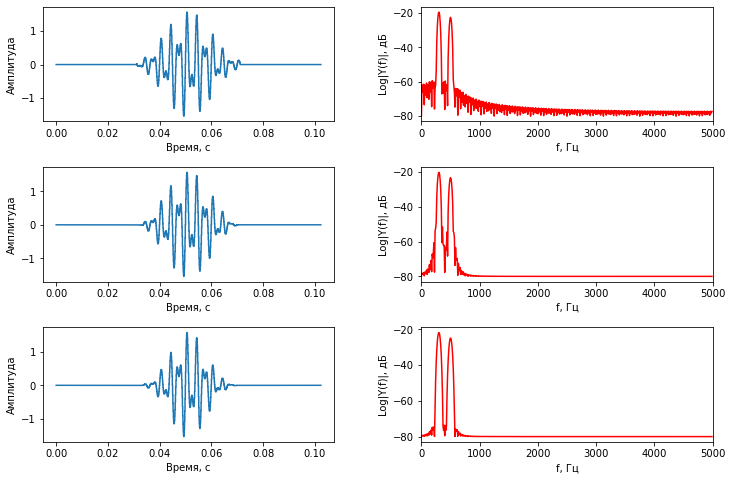

In [25]:
# Введите код для выполнения задания
#Сгенерируйте окна и выполните взвешивание сигнала
M=int(0.04*fd) #Длительность окна в отсчетах
win=np.zeros(N)
win[int(N/2-M/2):int(N/2+M/2)]=np.hamming(M)
yw1=y*win
win[int(N/2-M/2):int(N/2+M/2)]=np.hanning(M)
yw2=y*win
win[int(N/2-M/2):int(N/2+M/2)]=np.blackman(M)
yw3=y*win


#Вычислите спектры
Ylog1 = 20*np.log10(np.abs(fft(yw1)/N)+0.0001)
Ylog2 = 20*np.log10(np.abs(fft(yw2)/N)+0.0001)
Ylog3 = 20*np.log10(np.abs(fft(yw3)/N)+0.0001)


#Отобразите сигналы и спектры
f, ax = plt.subplots(3, 2,figsize=(12, 8))

graf(Ylog1, yw1, frq, 0)
graf(Ylog2, yw2, frq, 1)
graf(Ylog3, yw3, frq, 2)

plt.subplots_adjust(wspace=0.3, hspace=0.4)

#### Задание
1. Проанализируйте полученные спектры
2. Сравните полученные спектры с результатами из предыдущего эксперимента (из п. 4.2.)
3. Обратите внимание. Гармоники стали в спектре более отчетливы.
4. Попробуйте сделать вывод о влиянии формы окна на эффект просачивания и на спектр сигнала.

# 5. Исследование спектра временных окон разной формы
5.1. Сгенерируйте импульсы (прямоугольный, Хемминга, Ханна, Блэкмана):
- частота дискретизации 10000 Гц;
- длительность сигнала 1024 отсчета;
- длительность импульсов 10 мс.

5.2. Вычислите и отобразите спектры сгенерированных импульсов.
5.3. Проведите измерения уровня боковых лепестков и ширины главного лепестка полученных спектров. В отчете результаты измерений оформите в виде таблицы

|Тип окна|Уровень боковых лепестков, дБ|Ширина главного лепестка, Гц|
|-|-|-|
|Прямоугольное|??|??|
|Хэмминга|??|??|
|Ханна|??|??|
|Блэкмана|??|??|

5.4. Сравните результаты измерений в таблице с результатами анализа спектров в п. 4.4. и сделайте вывод о влиянии уровня боковых лепестков на величину эффекта просачивания


<ipython-input-28-bc1b4fb28069>:19: RuntimeWarning: divide by zero encountered in log10
  Ylog1 = 20*np.log10(np.abs(fft(yw1)/N))    #Вычисление БПФ и нормализация
<ipython-input-28-bc1b4fb28069>:21: RuntimeWarning: divide by zero encountered in log10
  Ylog3 = 20*np.log10(np.abs(fft(yw3)/N))    #Вычисление БПФ и нормализация
<ipython-input-28-bc1b4fb28069>:22: RuntimeWarning: divide by zero encountered in log10
  Ylog4 = 20*np.log10(np.abs(fft(yw4)/N))    #Вычисление БПФ и нормализация


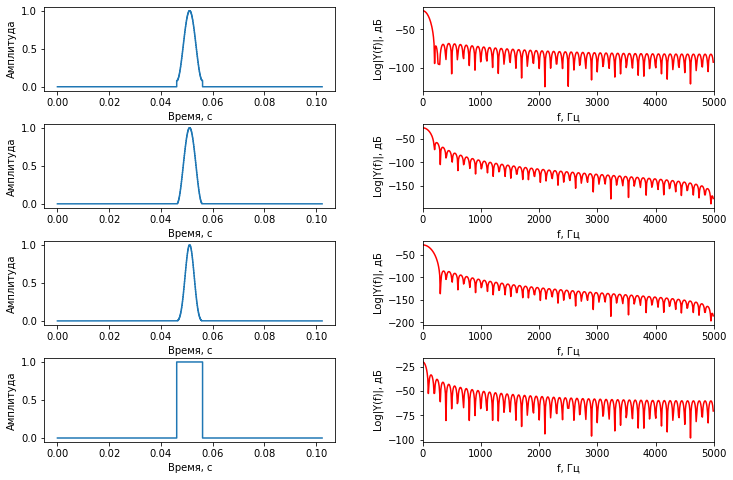

In [28]:
M=int(0.01*fd) #Длительность окна в отсчетах
win=np.zeros(N)
win[int(N/2-M/2):int(N/2+M/2)]=np.hamming(M)
yw1=win
win=np.zeros(N)
win[int(N/2-M/2):int(N/2+M/2)]=np.hanning(M)
yw2=win
win=np.zeros(N)
win[int(N/2-M/2):int(N/2+M/2)]=np.blackman(M)
yw3=win
signal_imp1, t1=imp_generator(fd, N, 0.01)
yw4=signal_imp1


k = np.arange(N) # Номера отсчетов спектра
T = float(N)/fd 
frq = k/T # Привязка отсчетов спектра к частотам (полный диапазон частот)

Ylog1 = 20*np.log10(np.abs(fft(yw1)/N))    #Вычисление БПФ и нормализация
Ylog2 = 20*np.log10(np.abs(fft(yw2)/N))    #Вычисление БПФ и нормализация
Ylog3 = 20*np.log10(np.abs(fft(yw3)/N))    #Вычисление БПФ и нормализация
Ylog4 = 20*np.log10(np.abs(fft(yw4)/N))    #Вычисление БПФ и нормализация

#Отобразите сигналы и спектры
f, ax = plt.subplots(4, 2,figsize=(12, 8))

graf(Ylog1, yw1, frq, 0)
graf(Ylog2, yw2, frq, 1)
graf(Ylog3, yw3, frq, 2)
graf(Ylog4, yw4, frq, 3)

plt.subplots_adjust(wspace=0.3, hspace=0.4)

In [29]:
m1, da1=charact(Ylog1)
m2, da2=charact(Ylog2)
m3, da3=charact(Ylog3)
m4, da4=charact(Ylog4)
print ('Уровень боковых лепестков импульса 4 мс.',da1)
print ('Уровень боковых лепестков импульса 2 мс.',da2)
print ('Уровень боковых лепестков импульса 1 мс.',da3)
print ('Уровень боковых лепестков импульса 1 мс.',da4)
print ('==============================================')
print ('Ширина главного лепестка импульса 4 мс.',m1)
print ('Ширина главного лепестка импульса 2 мс.',m2)
print ('Ширина главного лепестка импульса 1 мс.',m3)
print ('Ширина главного лепестка импульса 1 мс.',m4)

Уровень боковых лепестков импульса 4 мс. -45.77191509166464
Уровень боковых лепестков импульса 2 мс. -31.555426017278677
Уровень боковых лепестков импульса 1 мс. -58.16334529932595
Уровень боковых лепестков импульса 1 мс. -13.308842750489177
Ширина главного лепестка импульса 4 мс. 205.078125
Ширина главного лепестка импульса 2 мс. 205.078125
Ширина главного лепестка импульса 1 мс. 302.734375
Ширина главного лепестка импульса 1 мс. 97.65625
